In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
page_links_phone=[]
for i in range(1,22):
    page_links_phone.append(f"https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page={i}&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc")


In [3]:
page_links_phone

['https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page=1&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc',
 'https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page=2&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc',
 'https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page=3&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc',
 'https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page=4&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc',
 'https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false&limit=50&page=5&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc',
 'https://www.noon.com/egypt-en/electronics-and-mobiles/mobiles-and-accessories/mobiles-20905/?isCarouselView=false

In [4]:
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# Initialize lists to store extracted data
phone_names = []
phone_price = []
phone_old_price = []
phone_discount = []


# Set up the Chrome driver
s = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)
driver.maximize_window()

try:
    # Extract phone data from all pages
    for page in page_links_phone:
        driver.get(page)
        time.sleep(5)  
        
        phone_containers = driver.find_elements(By.XPATH, '/html/body/div[1]/div/section/div/div/div[2]/div[1]/span[*]/div/a')
        
        for container in phone_containers:
            
            try:
                name = container.find_element(By.XPATH, ".//div[@data-qa='product-name']").text.strip()
                phone_names.append(name)
            except NoSuchElementException:
                phone_names.append("No Name")

            try:
                price = container.find_element(By.XPATH, ".//div/div/div[2]/div[2]/div/div[1]").text.strip()
                phone_price.append(price.replace("EGP", "").replace(",", "").strip())
            except NoSuchElementException:
                phone_price.append("No Price")

            
            try:
                old_price = container.find_element(By.CSS_SELECTOR, ".oldPrice").text.strip()
                phone_old_price.append(old_price.replace("EGP", "").replace(",", "").strip())
            except NoSuchElementException:
                phone_old_price.append("No Sale")

           
            try:
                discount = container.find_element(By.CSS_SELECTOR, ".discount").text.strip()
                phone_discount.append(discount)
            except NoSuchElementException:
                phone_discount.append("No Discount")
            

finally:
   
    driver.quit()

data = {
    "Phone Name": phone_names,
    "Price": phone_price,
    "Old Price": phone_old_price,
    "Discount": phone_discount,
}




In [7]:
df=pd.DataFrame(data)

In [8]:
df

,Phone Name,Price,Old Price,Discount
0,ITEL A70 Dual SIM Field\nGreen (3+5)GB RAM 128G…,3622,4444,18% OFF
1,Samsung Galaxy A05s Dual\nSIM Black 4GB RAM 64...,5399,5555,No Discount
2,Xiaomi Redmi 13C Dual SIM\nNavy Blue 6GB RAM 1...,5704,8888,35% OFF
3,NOKIA C21 PLUS 3GB RAM\n64GB 4G LTE Warm Grey- …,3333,5099,34% OFF
4,OPPO Reno 12F 5G Dual\nSIM Olive Green 12GB RA…,15120,No Sale,No Discount
...,...,...,...,...
972,Apple UPGRADE |\nRefurbished |APPLE iPhon…,43099,44099,No Discount
973,Apple UPGRADE |\nRefurbished |APPLE iPhon…,50899,52299,No Discount
974,"Apple APPLE, IPHONE 14\nPRO MAX, 256GB, 6GB RA…",50899,52299,No Discount
975,Apple UPGRADE |\nRefurbished |APPLE iPhon…,19999,20999,No Discount


In [9]:
df['brand'] = df['Phone Name'].apply(lambda x:x.split(" ")[0])

In [10]:
df

,Phone Name,Price,Old Price,Discount,brand
0,ITEL A70 Dual SIM Field\nGreen (3+5)GB RAM 128G…,3622,4444,18% OFF,ITEL
1,Samsung Galaxy A05s Dual\nSIM Black 4GB RAM 64...,5399,5555,No Discount,Samsung
2,Xiaomi Redmi 13C Dual SIM\nNavy Blue 6GB RAM 1...,5704,8888,35% OFF,Xiaomi
3,NOKIA C21 PLUS 3GB RAM\n64GB 4G LTE Warm Grey- …,3333,5099,34% OFF,NOKIA
4,OPPO Reno 12F 5G Dual\nSIM Olive Green 12GB RA…,15120,No Sale,No Discount,OPPO
...,...,...,...,...,...
972,Apple UPGRADE |\nRefurbished |APPLE iPhon…,43099,44099,No Discount,Apple
973,Apple UPGRADE |\nRefurbished |APPLE iPhon…,50899,52299,No Discount,Apple
974,"Apple APPLE, IPHONE 14\nPRO MAX, 256GB, 6GB RA…",50899,52299,No Discount,Apple
975,Apple UPGRADE |\nRefurbished |APPLE iPhon…,19999,20999,No Discount,Apple


In [11]:
import re
df['sim_type'] = df['Phone Name'].apply(lambda x: re.findall("Dual SIM|Dual",x))

In [12]:
for index, row in df.iterrows():
    if row ['sim_type']:
        df.at[index, 'sim_type'] = row['sim_type'][0]
    else:
        df.at[index, 'sim_type']=""

In [13]:
df

,Phone Name,Price,Old Price,Discount,brand,sim_type
0,ITEL A70 Dual SIM Field\nGreen (3+5)GB RAM 128G…,3622,4444,18% OFF,ITEL,Dual SIM
1,Samsung Galaxy A05s Dual\nSIM Black 4GB RAM 64...,5399,5555,No Discount,Samsung,Dual
2,Xiaomi Redmi 13C Dual SIM\nNavy Blue 6GB RAM 1...,5704,8888,35% OFF,Xiaomi,Dual SIM
3,NOKIA C21 PLUS 3GB RAM\n64GB 4G LTE Warm Grey- …,3333,5099,34% OFF,NOKIA,
4,OPPO Reno 12F 5G Dual\nSIM Olive Green 12GB RA…,15120,No Sale,No Discount,OPPO,Dual
...,...,...,...,...,...,...
972,Apple UPGRADE |\nRefurbished |APPLE iPhon…,43099,44099,No Discount,Apple,
973,Apple UPGRADE |\nRefurbished |APPLE iPhon…,50899,52299,No Discount,Apple,
974,"Apple APPLE, IPHONE 14\nPRO MAX, 256GB, 6GB RA…",50899,52299,No Discount,Apple,
975,Apple UPGRADE |\nRefurbished |APPLE iPhon…,19999,20999,No Discount,Apple,


In [14]:
df['Price'] = df['Price'].astype(float)
df['Phone Name'] = df['Phone Name'].astype(str)
df['Old Price'] = df['Old Price'].astype(str)
df['Discount'] = df['Discount'].astype(str)
df['brand'] = df['brand'].astype(str)
df['sim_type'] = df['sim_type'].astype(str)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Phone Name  977 non-null    object 
 1   Price       977 non-null    float64
 2   Old Price   977 non-null    object 
 3   Discount    977 non-null    object 
 4   brand       977 non-null    object 
 5   sim_type    977 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.9+ KB


In [16]:
df.describe()

,Price
count,977.000000
mean,9928.998976
std,13186.310953
min,70.000000
25%,4049.000000
50%,6689.000000
75%,9999.000000
max,90000.000000


In [25]:
client = MongoClient("mongodb://localhost:27017/")
db = client["phone_database"]
collection = db["phones"]

# Insert data
data_dict = df.to_dict("records")
collection.insert_many(data_dict)

print("Data inserted successfully into MongoDB!")

Data inserted successfully into MongoDB!


In [26]:
for data in collection.find():
    print(data)

{'_id': ObjectId('676c7e1a9126760441107e32'), 'Phone Name': 'ITEL A70 Dual SIM Field\nGreen (3+5)GB RAM 128G…', 'Price': 3622.0, 'Old Price': 4444.0, 'Discount': 18.0, 'brand': 'ITEL', 'sim_type': 'Dual SIM'}
{'_id': ObjectId('676c7e1a9126760441107e33'), 'Phone Name': 'Samsung Galaxy A05s Dual\nSIM Black 4GB RAM 64GB …', 'Price': 5399.0, 'Old Price': 5555.0, 'Discount': nan, 'brand': 'Samsung', 'sim_type': 'Dual'}
{'_id': ObjectId('676c7e1a9126760441107e34'), 'Phone Name': 'Xiaomi Redmi 13C Dual SIM\nNavy Blue 6GB RAM 128G…', 'Price': 5704.0, 'Old Price': 8888.0, 'Discount': 35.0, 'brand': 'Xiaomi', 'sim_type': 'Dual SIM'}
{'_id': ObjectId('676c7e1a9126760441107e35'), 'Phone Name': 'NOKIA C21 PLUS 3GB RAM\n64GB 4G LTE Warm Grey- …', 'Price': 3333.0, 'Old Price': 5099.0, 'Discount': 34.0, 'brand': 'NOKIA', 'sim_type': ''}
{'_id': ObjectId('676c7e1a9126760441107e36'), 'Phone Name': 'OPPO Reno 12F 5G Dual\nSIM Olive Green 12GB RA…', 'Price': 15120.0, 'Old Price': nan, 'Discount': nan, 'br

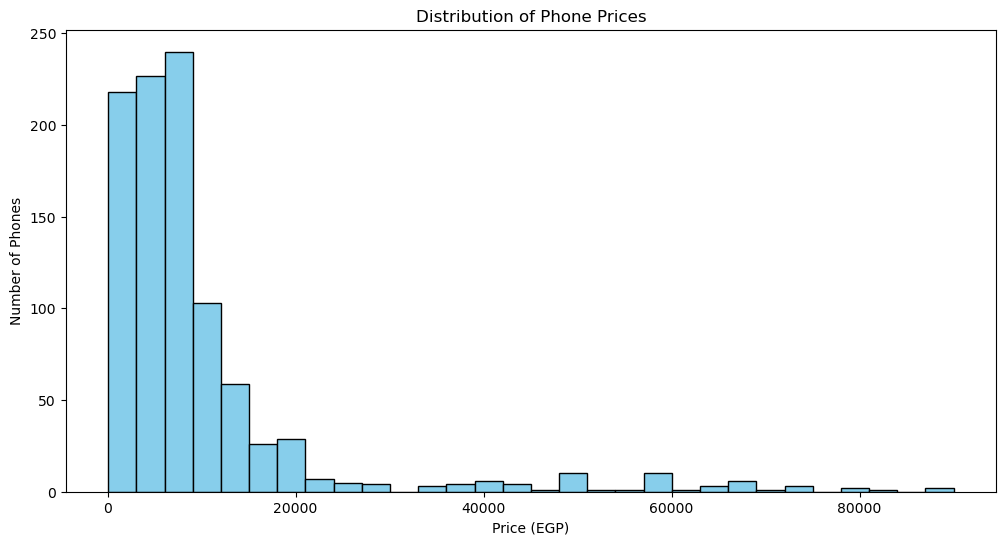

In [31]:
prices_cursor = collection.find({}, {'_id': 0, 'Price': 1})

prices = []
for doc in prices_cursor:
    price = doc.get('Price')
    if price is not None and price != 'No Price':
        try:
            prices.append(float(price))
        except ValueError:
            pass  

if prices:
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Phone Prices')
    plt.xlabel('Price (EGP)')
    plt.ylabel('Number of Phones')
    plt.show()
else:
    print("No price data available for plotting.")

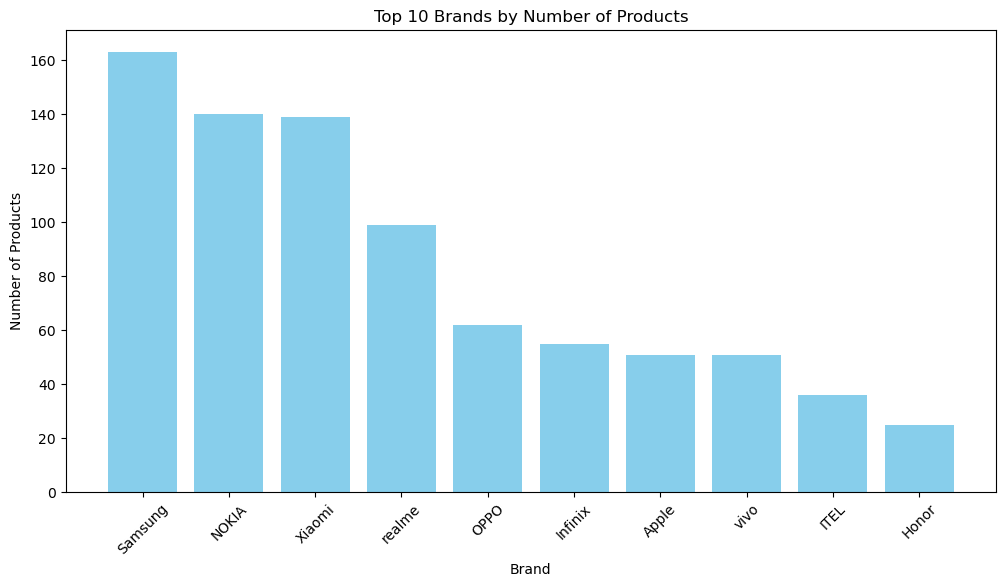

In [30]:
from collections import Counter
brands_cursor = collection.find({}, {'_id': 0, 'brand': 1})

brands = [doc.get('brand', 'Unknown') for doc in brands_cursor]

brand_counts = Counter(brands)

top_brands = brand_counts.most_common(10)
brands, counts = zip(*top_brands)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(brands, counts, color='skyblue')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

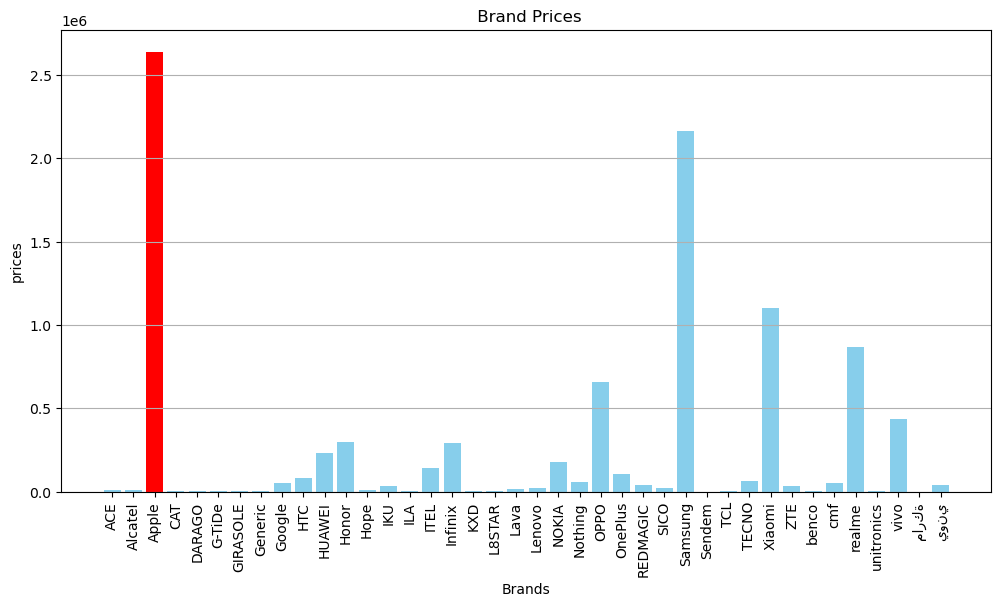

maximum brand price: Apple sales are: 2638453.0


In [17]:
#subset_df = df.head(100)
brand_price = df.groupby('brand')['Price'].sum()
max_price = brand_price.idxmax()

# Plot the weekly sales for each store
plt.figure(figsize=(12, 6))
plt.bar(brand_price.index, brand_price.values, color='skyblue')

# Highlight the store with maximum weekly sales
plt.bar(max_price, brand_price[max_price], color='red')
plt.title(' Brand Prices')
plt.xlabel('Brands')
plt.ylabel('prices')
plt.xticks(brand_price.index, rotation=90)
plt.grid(axis='y')
plt.show()

print("maximum brand price:", max_price,'sales are:',brand_price.max())


In [18]:
# Replace 'No Sale' in 'Old Price' with NaN and convert to float
df['Old Price'] = df['Old Price'].replace('No Sale', np.nan)
df['Old Price'] = df['Old Price'].astype(float)

# Clean 'Discount' column and extract discount percentages
df['Discount'] = df['Discount'].replace('No Discount', '')
df['Discount'] = df['Discount'].str.replace('% OFF', '').str.strip()
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

# Display the first few rows to check the data
df.head()

,Phone Name,Price,Old Price,Discount,brand,sim_type
0,ITEL A70 Dual SIM Field\nGreen (3+5)GB RAM 128G…,3622.0,4444.0,18.0,ITEL,Dual SIM
1,Samsung Galaxy A05s Dual\nSIM Black 4GB RAM 64...,5399.0,5555.0,NaN,Samsung,Dual
2,Xiaomi Redmi 13C Dual SIM\nNavy Blue 6GB RAM 1...,5704.0,8888.0,35.0,Xiaomi,Dual SIM
3,NOKIA C21 PLUS 3GB RAM\n64GB 4G LTE Warm Grey- …,3333.0,5099.0,34.0,NOKIA,
4,OPPO Reno 12F 5G Dual\nSIM Olive Green 12GB RA…,15120.0,NaN,NaN,OPPO,Dual


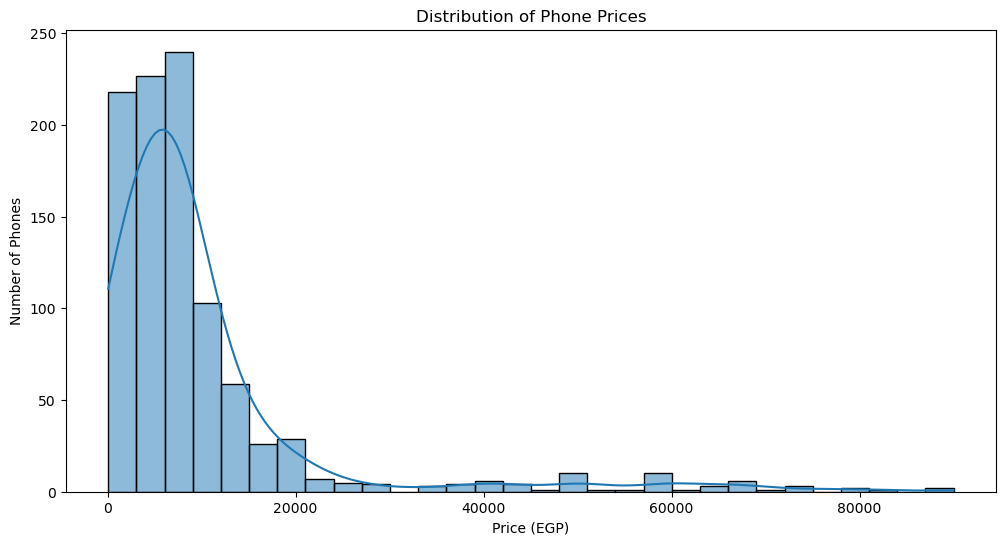

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Phone Prices')
plt.xlabel('Price (EGP)')
plt.ylabel('Number of Phones')
plt.show()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_9600\2784432370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


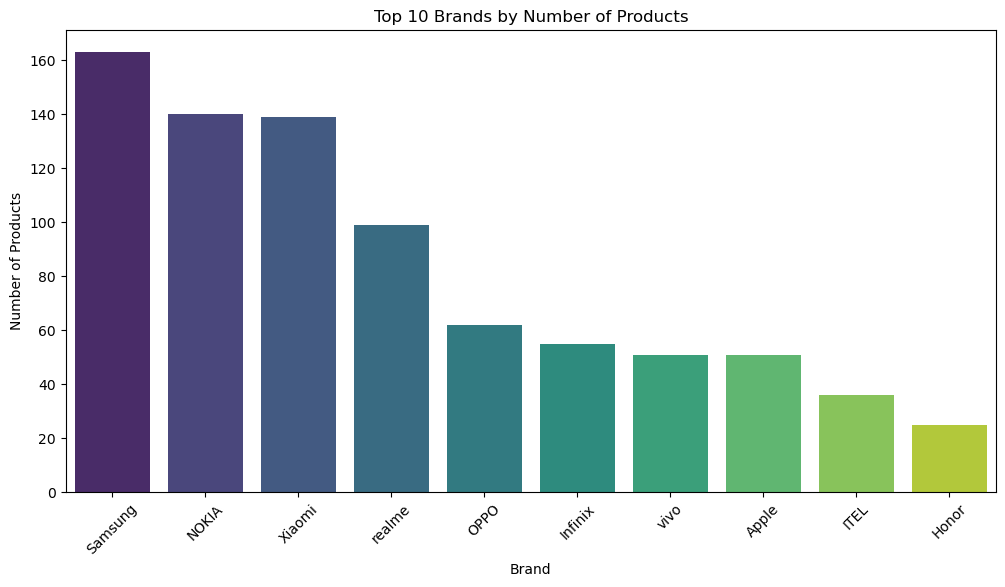

In [20]:
plt.figure(figsize=(12, 6))
top_brands = df['brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_9600\3458492128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette='coolwarm')


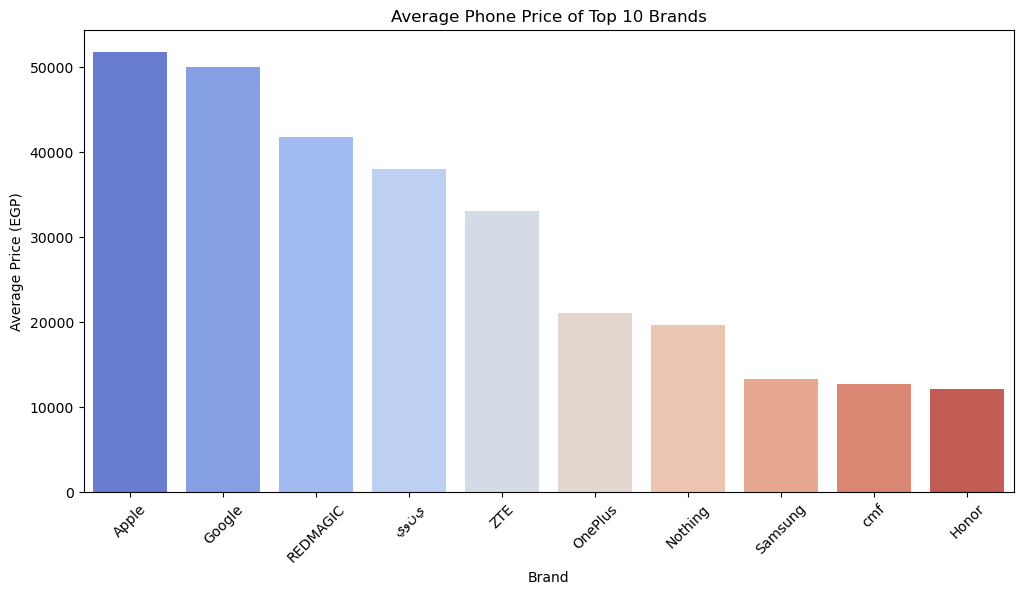

In [21]:
avg_price_brand = df.groupby('brand')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette='coolwarm')
plt.title('Average Phone Price of Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price (EGP)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_9600\374052444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='Price', data=df_top_brands, palette='Set2')


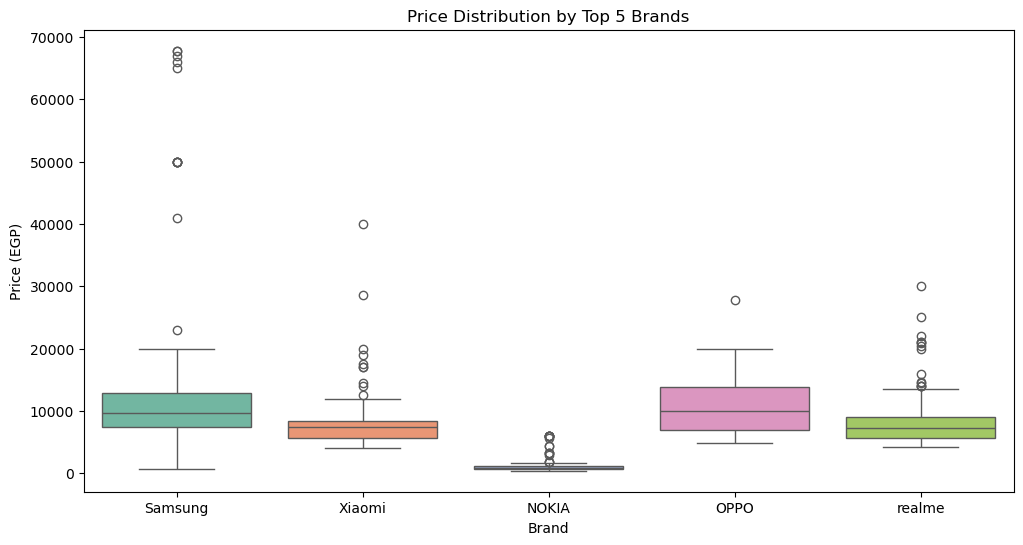

In [22]:
top_brands_list = df['brand'].value_counts().head(5).index.tolist()
df_top_brands = df[df['brand'].isin(top_brands_list)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='Price', data=df_top_brands, palette='Set2')
plt.title('Price Distribution by Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (EGP)')
plt.show()

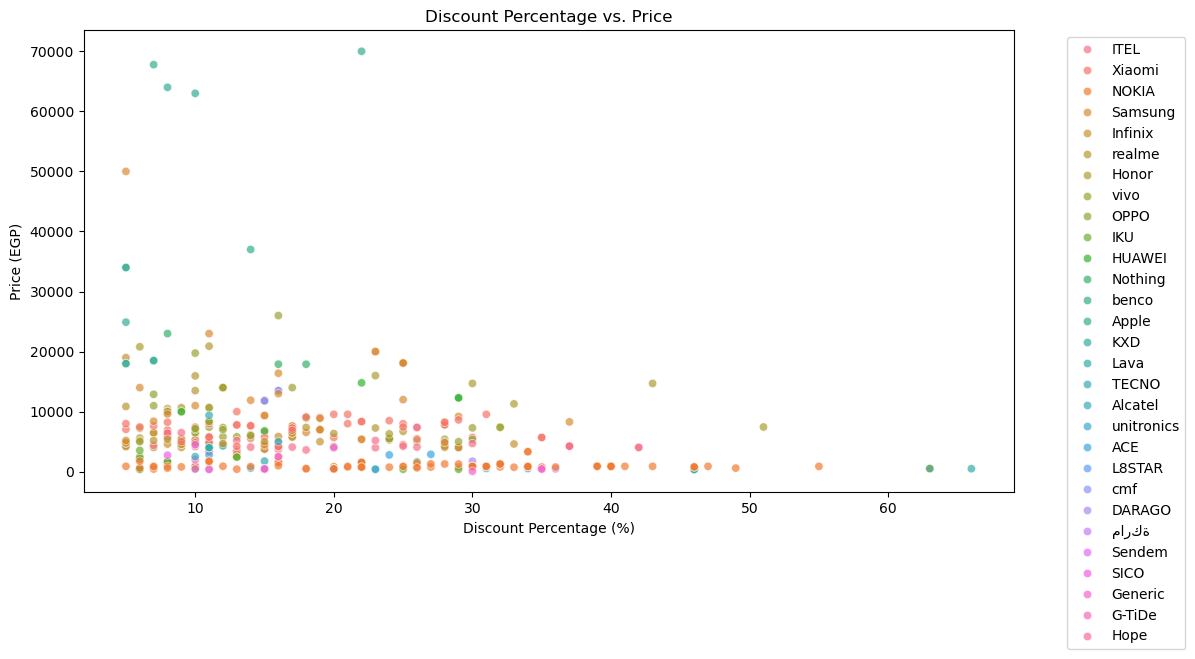

In [23]:
# Filter out entries without discounts
df_discounts = df[df['Discount'] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Price', data=df_discounts, hue='brand', alpha=0.7)
plt.title('Discount Percentage vs. Price')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Price (EGP)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

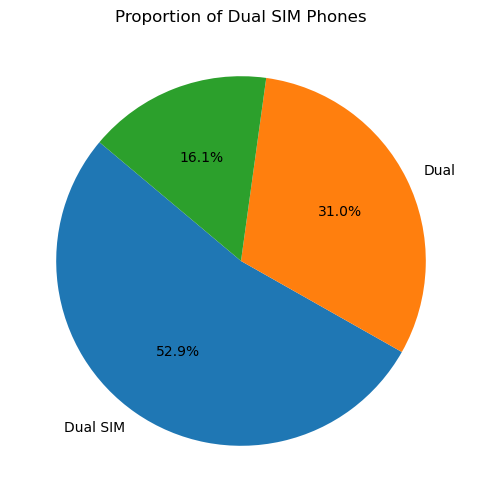

In [24]:
sim_counts = df['sim_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sim_counts.values, labels=sim_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Dual SIM Phones')
plt.show()

D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

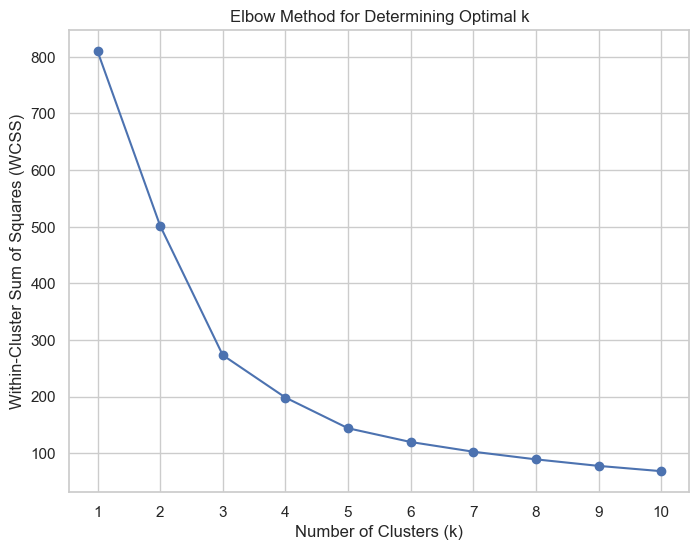

D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Mega Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


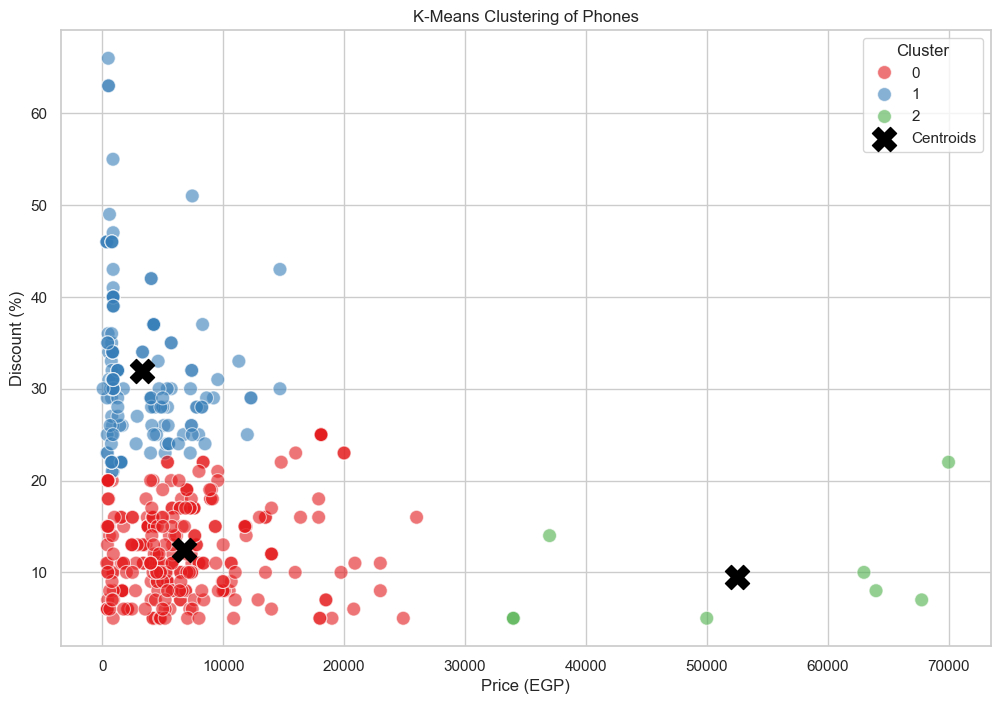

Cluster 0:
Number of Phones: 256
Average Price: 6743.95 EGP
Average Discount: 12.42%
----------------------------------------
Cluster 1:
Number of Phones: 141
Average Price: 3296.08 EGP
Average Discount: 31.91%
----------------------------------------
Cluster 2:
Number of Phones: 8
Average Price: 52471.62 EGP
Average Discount: 9.50%
----------------------------------------


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")
df_cluster = df.dropna(subset=['Price', 'Discount']).copy()
df_cluster.reset_index(drop=True, inplace=True)
# Step 2: Feature Selection and Scaling
X = df_cluster[['Price', 'Discount']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine Optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.show()

# Step 4: Apply KMeans Clustering
k = 3  # Choose k based on Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Step 5: Visualize the Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Price',
    y='Discount',
    hue='Cluster',
    palette='Set1',
    data=df_cluster,
    alpha=0.6,
    s=100
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)
plt.title('K-Means Clustering of Phones')
plt.xlabel('Price (EGP)')
plt.ylabel('Discount (%)')
plt.legend(title='Cluster')
plt.show()

# Step 6: Interpret the Clusters
for i in range(k):
    cluster = df_cluster[df_cluster['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"Number of Phones: {cluster.shape[0]}")
    print(f"Average Price: {cluster['Price'].mean():.2f} EGP")
    print(f"Average Discount: {cluster['Discount'].mean():.2f}%")
    print('-' * 40)